<a href="https://colab.research.google.com/github/git2101487/DeepLearning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(畳み込みを含むニューラルネットワーク)でモデルに学習させる(=訓練)

## 学習モデルのライブラリをimport

In [11]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

## keras自身もimport

In [12]:
import keras

## SVG画像表示用のライブラリをimport

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

## その他のライブラリをimport

In [14]:
# 乱数をつくるためにNumpyをimport
import numpy as np # importして、npという別名を設定
# 早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks # callbakcsという別名を設定

## Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [15]:
# 学習用データをx_trainとして作る
x_train = np.random.random((100, 6, 6, 1))
# 学習用データの正解をy_trainとして作る
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100,1)),
                                                         num_classes=10)

In [16]:
# テスト検証用データをx_testとして作る
# (6,6,1)の形を今度は20セット分
y_test = np.random.random((20, 6, 6, 1))
# テスト検証用データの正解をy_testとして作る
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20,1)),
                                    num_classes=10
                                    )

## 学習モデルを生成する

In [17]:
model = Sequential()

## 学習モデルにニューロン層を追加してニューラルネットワークにする

### 畳み込み層を追加

In [18]:
model.add(Conv2D(
    filters=3, # フィルター3パターン
    kernel_size=(3,3), # 受容野のサイズ縦3,横3
    kernel_initializer='lecun_uniform',
    input_shape=(6, 6, 1), # 入力データの形縦6,横6
    name = 'Conv2D_1'
))

## その他の層も追加する

In [19]:
# 全結合層
model.add(Flatten(name='Flatten_1'))
# softmaxで分類するニューロン層
model.add(Dense(units=10, activation='softmax', name='Dense_1'))

## 組み立てた学習モデルの構成を、SVG画像として表示



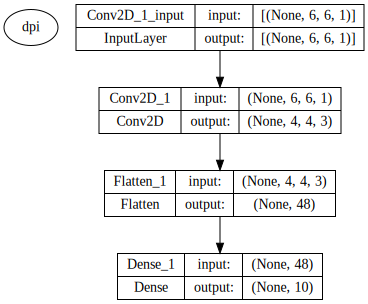

In [22]:
SVG(model_to_dot(model,
                 show_shapes=True, dpi=None
                ).create(prog='dot', format='svg'))

## 組み立てたモデルを学習データで訓練する
### 早期終了も設定する

In [24]:
# 早期終了用の設定オブジェクトを用意する
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', # 損失を監視
                                        patience=5) # epoch5つ分様子を見る

## 学習方法を指定して学習モデルをコンパイルする

In [25]:
model.compile(loss='mean_squared_error', # 平均(mean)二乗(Suqared)誤差(Error)で計算
              optimizer='sgd' # パラメータの重みをSDGで最適化する
              # SGD = 確率的勾配降下法
              )

## 学習方法を指定した学習モデルを訓練する

In [26]:
model.fit(x_train, y_train, # 学習データと答えデータ
          batch_size=32, # 32個ずつまとめて学習(=バッチ)してから重みを調整する
          epochs=10, # バッチが終わったら重みを調整して学習しなおす、その回数
          callbacks=[earlyStopping], # エポックの中で呼ぶcallback処理のリストに早期終了を追加
          validation_split=0.2 # 学習データの内2割を、学習中の自己評価検証に使う
          )

Epoch 1/10
3/3 [==============================] - 1s 106ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 5/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 8/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 9/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 10/10
3/3 [==============================] - 0s 14ms/step - loss: 0.0918 - val_loss: 0.0900
